### **mnist Number Dataset**

In [ ]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from sklearn.metrics import mean_squared_error
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
print("x train shape is : ",x_train.shape)
print("y train shape is : ",y_train.shape)
print("x test shape is : ",x_test.shape)
print("y test shape is : ",y_test.shape)

x train shape is :  (60000, 28, 28)
y train shape is :  (60000,)
x test shape is :  (10000, 28, 28)
y test shape is :  (10000,)


In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
print(y_train[0])

5


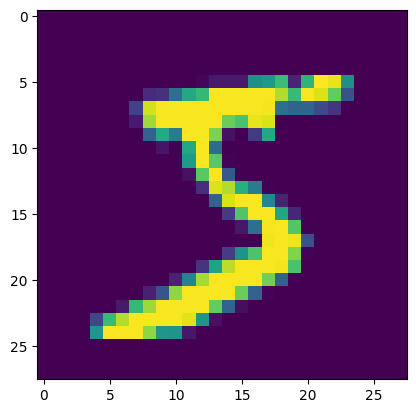

In [ ]:
img = plt.imshow(x_train[0])
img

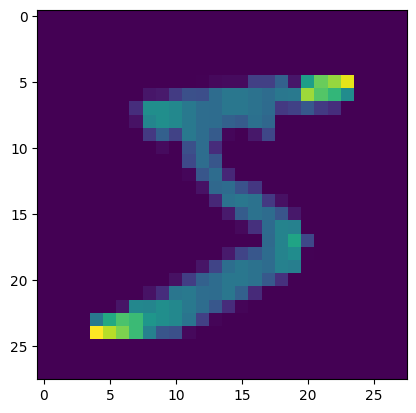

In [ ]:
import tensorflow as tf
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0])

In [ ]:
# x_train = x_train/255
# x_test = x_test/255

In [ ]:
x_train = np.array(x_train).reshape(-1,28,28,1)
x_test = np.array(x_test).reshape(-1,28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# model = Sequential(
#     [
#         Flatten(input_shape=(28,28)),
#         Dense(128,activation='relu'),
#         Dense(64,activation='relu'),
#         Dense(10,activation='sigmoid')
#     ]
# )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Flatten,Dense

In [ ]:
model = Sequential()

In [ ]:
#conv
model.add(Conv2D(64,(3,3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#fullyCon
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,416 (310.22 KB)

 Trainable params: 79,416 (310.22 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train, y_train, epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 78s 59ms/step - accuracy: 0.9499 - loss: 0.1744 - val_accuracy: 0.9679 - val_loss: 0.1041
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.9731 - loss: 0.0894 - val_accuracy: 0.9713 - val_loss: 0.0933
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9798 - loss: 0.0652 - val_accuracy: 0.9706 - val_loss: 0.0914
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.9838 - loss: 0.0508 - val_accuracy: 0.9768 - val_loss: 0.0746
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 74s 57ms/step - accuracy: 0.9872 - loss: 0.0394 - val_accuracy: 0.9808 - val_loss: 0.0641


In [ ]:
loss,accuracy = model.evaluate(x_train,y_train)
print("Train accuracy :",accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9909 - loss: 0.0301
Train accuracy : 0.9882166385650635


In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print("Test accuracy :",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9794 - loss: 0.0673
Test accuracy : 0.9837999939918518


In [ ]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [ ]:
label_pred = [np.argmax(i) for i in y_pred]
print(label_pred)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

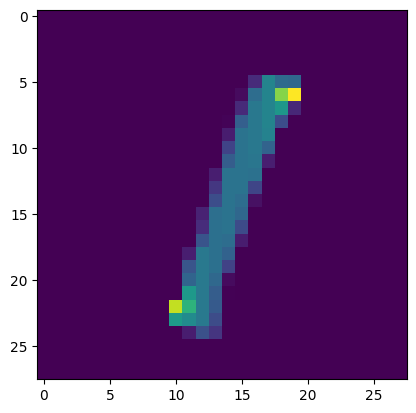

In [ ]:
plt.imshow(x_test[5])

In [ ]:
print(y_test[5])

1


In [ ]:
label_pred[5]

1

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,label_pred)
cm

array([[ 965,    3,    5,    0,    0,    0,    3,    3,    0,    1],
       [   0, 1131,    1,    1,    0,    0,    1,    1,    0,    0],
       [   0,    2, 1008,    2,    1,    0,    1,   17,    1,    0],
       [   0,    0,    2,  999,    0,    5,    0,    3,    1,    0],
       [   0,    2,    1,    0,  966,    0,    2,    3,    0,    8],
       [   1,    2,    1,    7,    0,  874,    2,    1,    1,    3],
       [   1,    2,    1,    0,    3,    1,  949,    0,    1,    0],
       [   0,    6,    7,    2,    0,    0,    0, 1012,    1,    0],
       [   1,    1,    1,    1,    4,    3,    0,    6,  951,    6],
       [   3,    4,    1,    1,    6,    1,    1,    8,    1,  983]])

Text(158.22222222222223, 0.5, 'predicted')

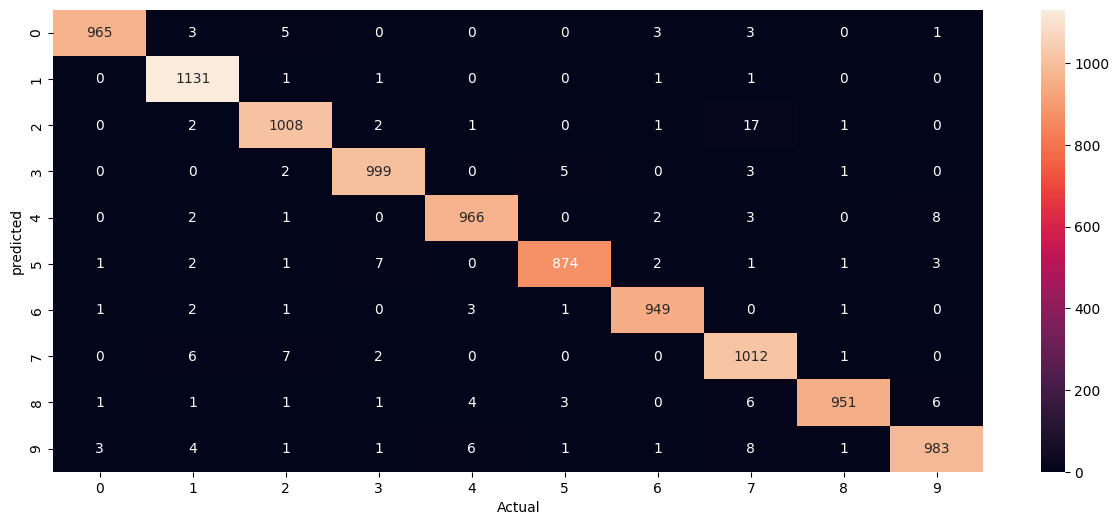

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Actual')
plt.ylabel('predicted')

### check on unseen data

In [ ]:
data =  mnist.load_data()

In [ ]:
x_test= x_test[8]
y_test = y_test[8]

In [ ]:
x_test.shape

(28, 28, 1)

In [ ]:
y_test

5

In [ ]:
new_pred = model.predict(x_test.reshape(-1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


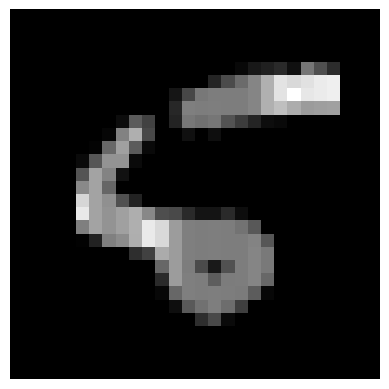

In [ ]:
image = x_test.reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Class Probabilities')

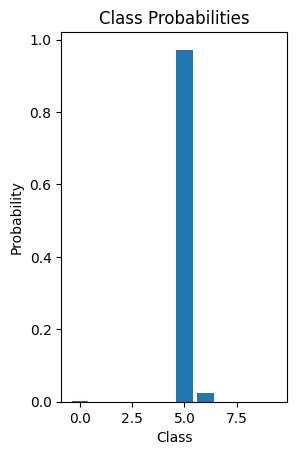

In [ ]:
probs = new_pred[0]
classes = np.arange(len(probs))
plt.subplot(1, 2, 2)
plt.bar(classes, probs)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Class Probabilities')

In [ ]:
#new

In [ ]:
img = cv2.imread('/content/test.png')

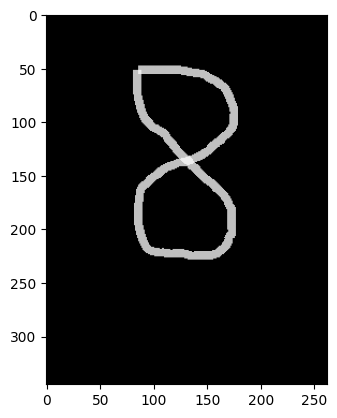

In [ ]:
from google.colab.patches import cv2_imshow
plt.imshow(img)

In [ ]:
img.shape

(345, 262, 3)

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray.shape

(345, 262)

In [ ]:
resized = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
resized.shape

(28, 28)

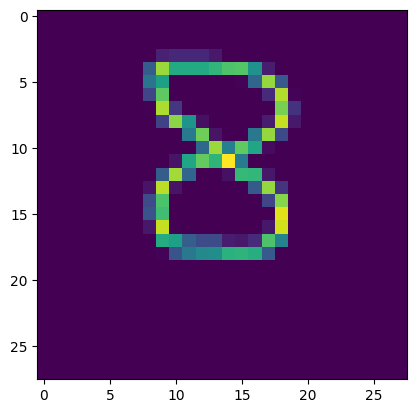

In [ ]:
plt.imshow(resized)

In [ ]:
new_img = tf.keras.utils.normalize(resized,axis=1)

In [ ]:
new_img = np.array(new_img).reshape(-1,28,28,1)
new_img.shape

(1, 28, 28, 1)

In [ ]:
res = model.predict(new_img)
print(np.argmax(res))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
8


In [ ]:
#test2

In [ ]:
img = cv2.imread('/content/test2.png')
img.shape

(345, 262, 3)

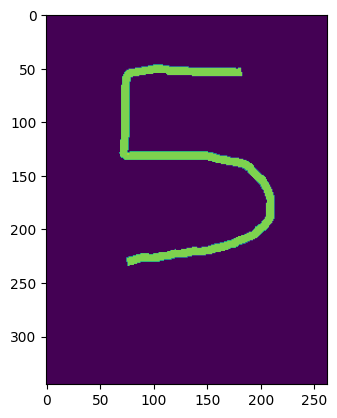

In [ ]:
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img)

In [ ]:
gray_img.shape

(345, 262)

In [ ]:
new_img = cv2.resize(gray_img,(28,28))
new_img.shape

(28, 28)

In [ ]:
new_img = new_img/255

In [ ]:
new_img = np.array(new_img).reshape(-1,28,28,1)
new_img.shape

(1, 28, 28, 1)

In [ ]:
pred = model.predict(new_img)
print(np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
5
